<a href="https://colab.research.google.com/github/josem-1/titanic/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#project
#Introduction:
#I will be working on the "Titanic - Machine Learning from Disaster" problem. I will be working alone. My task is predicting whether a person survived during the titanic disaster with an accuracy of atleast 80 percent.
#I have to predict survived or not survived, so binary, for different passengers based on variables like their pclass, sex, age, family aboard and a couple other ones.
#I plan to use logistic regression and random forest

#i want to try using total family size and also generate a binary value on whether there is missing data I am not sure if the missing data points will serve as a feature in and of itself

In [ ]:
#Data exploration
#I looked at a bit of the data and information about the data using the .head and .info functions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


df = pd.read_csv('train.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.isnull().sum()/len(df)*100)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

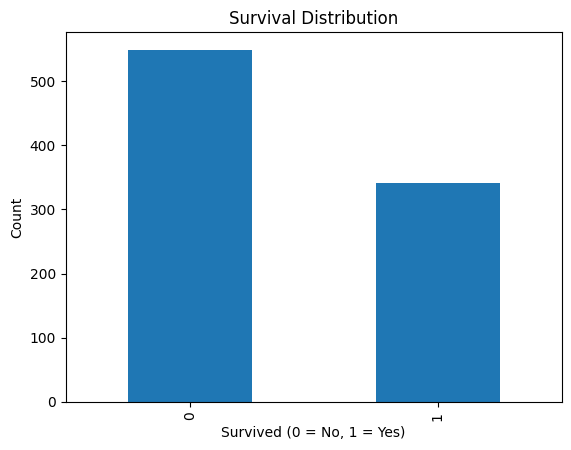

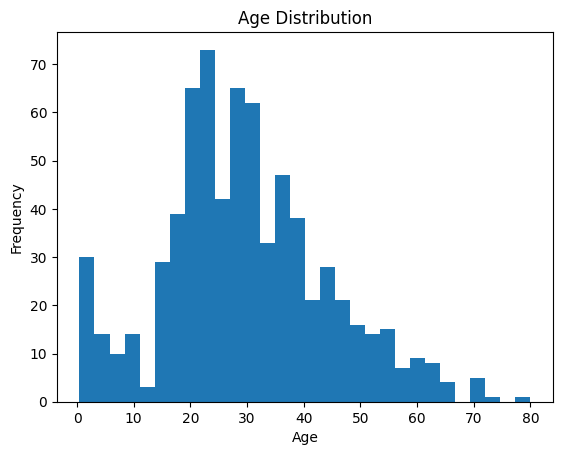

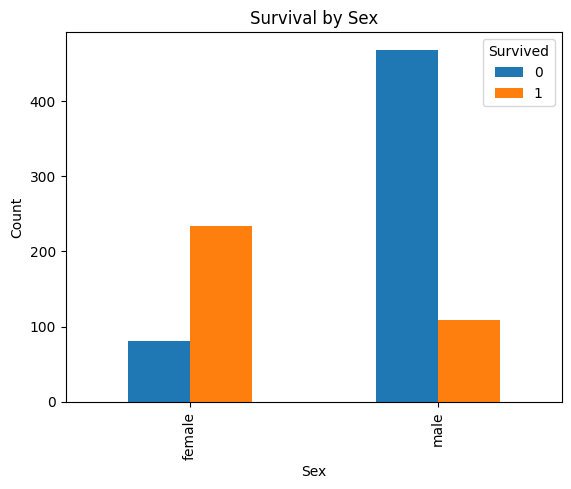

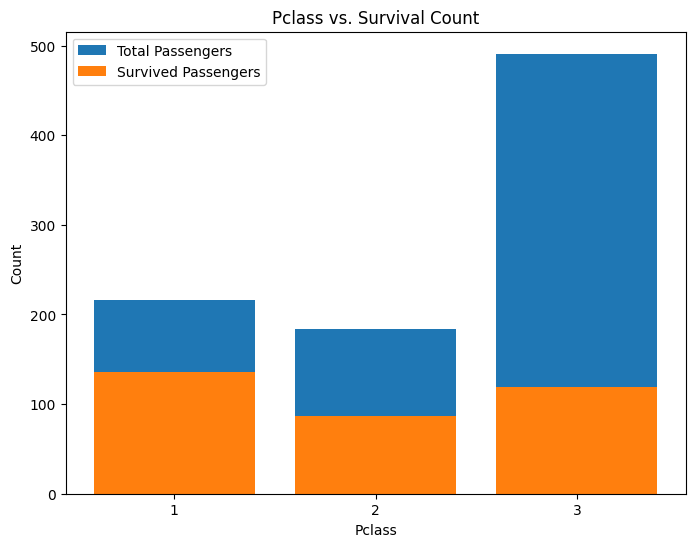

In [ ]:
#First bargraph is is just a survival/nonsurvival count distribution
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


#Second bargraph is an age Distribution
df['Age'].plot(kind='hist', bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

#Third chart is number of survived per male and female
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#fourth char is survival count per pclass
survival_by_pclass = df.groupby('Pclass')['Survived'].sum()
total_by_pclass = df['Pclass'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(total_by_pclass.index, total_by_pclass.values, label='Total Passengers')
plt.bar(survival_by_pclass.index, survival_by_pclass.values, label='Survived Passengers')

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass vs. Survival Count')
plt.xticks(total_by_pclass.index)
plt.legend()
plt.show()


In [ ]:
#this creates the missing-data features based on the columns that had missing data points
df['Age_missing'] = df['Age'].isnull().astype(int)
df['Embarked_missing'] = df['Embarked'].isnull().astype(int)
df['Cabin_missing'] = df['Cabin'].isnull().astype(int)

In [ ]:
#this fills in the missing values for age with median and the missing values for embarked with mode
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



In [ ]:
# converting categorical values to binary values
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [ ]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Age_missing', 'Embarked_missing',
       'Cabin_missing', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [ ]:


#this splits data into features (X) and target (y)
#did not include passengerid, survived, name, ticket, cabin in feature columns as those features don't seem to provide much useful computation information

feature_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C','Embarked_Q', 'Embarked_S']
X = df[feature_columns]
y = df['Survived']

#i split data into training and testing sets with an 80 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
#this trains logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

print("logistic regression model is trained")

#this trains randomforest classifier model
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print("random forest model is trained")

logistic regression model is trained
random forest model is trained


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.81


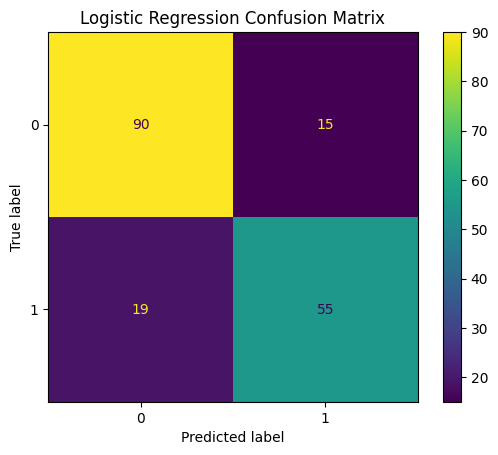

In [ ]:
#predictions for logisting reg
y_pred_lr = log_reg.predict(X_test)

#this show classification report and accuracy for logistic reg
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")

#confusion matrix for log reg
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

Accuracy: 0.82


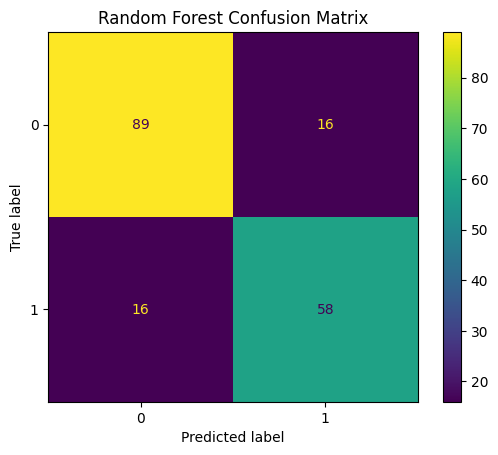

In [ ]:
#predictions for ranodm forest
y_pred_rf = rf_clf.predict(X_test)

#classificton report and accuracy for random foreset
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

#confusion matrix for random forest
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
#now i will try generating the features family size to exclude sibsp/parch
#after this i'll test for accuracy, if worse, ill revert to sibsp/parch
#i'll test the missing-data-binary feature with the better of the two

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


feature_columns_family_size = ['Pclass', 'Age', 'Fare', 'FamilySize', 'SibSp', 'Parch',
                               'Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X_family_size = df[feature_columns_family_size]


X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_family_size, y, test_size=0.2, random_state=42)


log_reg_fs = LogisticRegression(max_iter=1000)
log_reg_fs.fit(X_train_fs, y_train_fs)


rf_clf_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_fs.fit(X_train_fs, y_train_fs)

print("Models trained with Family Size feature.")



Models trained with Family Size feature.


=== Logistic Regression with Family Size ===
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Logistic Regression Accuracy with Family Size: 0.81


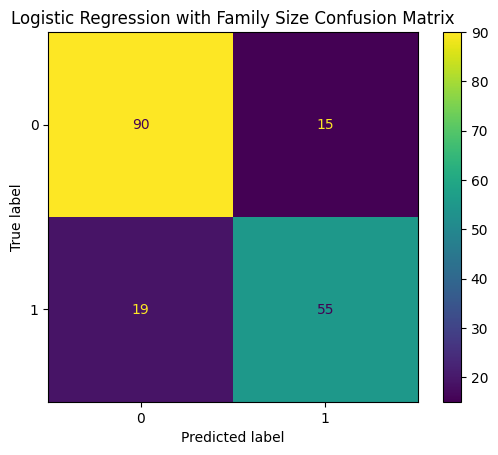

=== Random Forest with Family Size ===
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Random Forest Accuracy with Family Size: 0.83


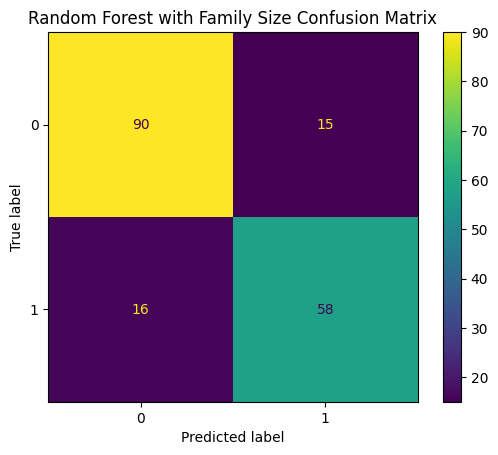

In [ ]:
from sklearn.metrics import accuracy_score


y_pred_lr_fs = log_reg_fs.predict(X_test_fs)
accuracy_lr_fs = accuracy_score(y_test_fs, y_pred_lr_fs)


y_pred_rf_fs = rf_clf_fs.predict(X_test_fs)
accuracy_rf_fs = accuracy_score(y_test_fs, y_pred_rf_fs)


print("=== Logistic Regression with Family Size ===")
print(classification_report(y_test_fs, y_pred_lr_fs))
print(f"Logistic Regression Accuracy with Family Size: {accuracy_lr_fs:.2f}")
ConfusionMatrixDisplay(confusion_matrix(y_test_fs, y_pred_lr_fs)).plot()
plt.title("Logistic Regression with Family Size Confusion Matrix")
plt.show()

print("=== Random Forest with Family Size ===")
print(classification_report(y_test_fs, y_pred_rf_fs))
print(f"Random Forest Accuracy with Family Size: {accuracy_rf_fs:.2f}")
ConfusionMatrixDisplay(confusion_matrix(y_test_fs, y_pred_rf_fs)).plot()
plt.title("Random Forest with Family Size Confusion Matrix")
plt.show()


In [ ]:
#the accuracy seems to not improve based on using familysize with the logistic regression model but a 3 percent increase with the random forest classifier
#i'll keep the family size

In [ ]:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
feature_columns_with_missing = ['Pclass', 'Age', 'SibSp', 'Parch', 'FamilySize',  'Fare',
                                'Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
                                'Age_missing', 'Embarked_missing', 'Cabin_missing']

X = df[feature_columns_with_missing]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

print("Models trained with missing data indicators.")


Models trained with missing data indicators.


=== Logistic Regression with dissing data Indicators ===
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Logistic Regression Accuracy with Missing Data Indicators: 0.82


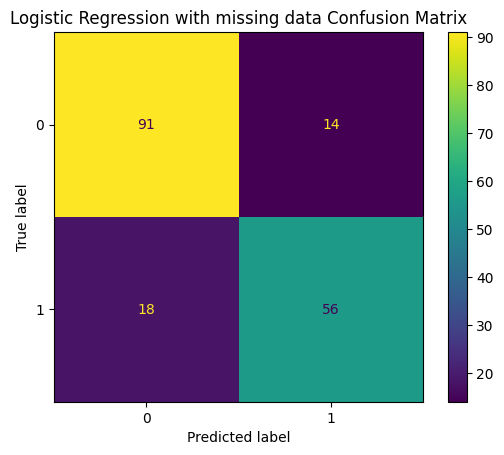

=== Random Forest with Missing Data Indicators ===
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Random Forest Accuracy with Missing Data Indicators: 0.80


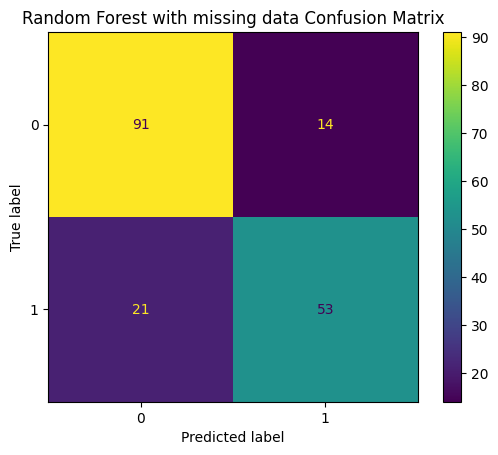

In [ ]:

y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)


y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


print("=== Logistic Regression with dissing data Indicators ===")
print(classification_report(y_test, y_pred_lr))
print(f"Logistic Regression Accuracy with Missing Data Indicators: {accuracy_lr:.2f}")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot()
plt.title("Logistic Regression with missing data Confusion Matrix")
plt.show()

print("=== Random Forest with Missing Data Indicators ===")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest Accuracy with Missing Data Indicators: {accuracy_rf:.2f}")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()
plt.title("Random Forest with missing data Confusion Matrix")
plt.show()
